<a href="https://colab.research.google.com/github/GaelGarciaSanchez/Optativa-Profesional/blob/main/BDNetflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pandas matplotlib seaborn plotly
!pip install --upgrade pandas seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.6.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/GaelGarciaSanchez/Optativa-Profesional/refs/heads/main/NetFlix.csv', sep = ',' )

df.head()
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,int64


In [45]:
print(df['date_added'].head())

0    14-Aug-20
1    15-Dec-17
2     5-Jan-19
3     1-Mar-16
4     3-Dec-18
Name: date_added, dtype: object


In [46]:
#intentamos convertir directamente capturando errores
try:
    df['date_added'] = pd.to_datetime(df['date_added'])
except ValueError:
    df['date_added'] = pd.to_datetime(df['date_added'],format='%B %d,%7' ,errors='coerce')

<ipython-input-46-ba05a292b804>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_added'] = pd.to_datetime(df['date_added'])


In [47]:
#verificar el tipo de dato
print(df['date_added'].dtype)

datetime64[ns]


In [48]:
#mostrar las primeras filas
print (df['date_added'].head())

#si hya valores NaT despues de la conversion los podemos identificar asi
print(df['date_added'].isna().sum())

0   2020-08-14
1   2017-12-15
2   2019-01-05
3   2016-03-01
4   2018-12-03
Name: date_added, dtype: datetime64[ns]
10


In [49]:
#definir direcciones de mapeo
rating_map = {
    'G': 1,
    'PG': 2,
    'PG-13': 3,
    'R': 4,
    'NC-17': 5,
    'TV-Y': 1,
    'TV-Y7': 2,
    'TV-G': 1,
    'TV-PG': 2,
    'TV-14': 3,
    'TV-MA': 4
}

In [50]:
#crear una nueva columna 'rating numeric' con los valores convertidos
df['rating_numeric'] = df['rating'].map(rating_map)

In [51]:
#para manejar cualquier rating que no este en el diccionario, puedes usar un valor
#mostrar las primeras filas para verificar la conversion
print(df[['rating', 'rating_numeric']].head())
#obtener estadisticas basicas DE LA NUEVA COLUMNA  numerica
print(df['rating_numeric'].describe())

  rating  rating_numeric
0  TV-MA             4.0
1  TV-MA             4.0
2  TV-PG             2.0
3      R             4.0
4   TV-G             1.0
count    7685.000000
mean        3.154066
std         0.936116
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: rating_numeric, dtype: float64


In [52]:
df['rating_numeric'] = df['rating_numeric'].fillna(0)


In [35]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,rating_numeric
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,4.0
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,2019-01-05,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...,2.0
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,2016-03-01,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...,4.0
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,2018-12-03,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...,1.0


In [53]:
numeric_columns = ['release_year','duration','rating_numeric']
print("Estadisticas descriptivas para las variables numericas:")
print(df[numeric_columns].describe())

df['rating_numeric'] = df['rating_numeric'].fillna(0)


Estadisticas descriptivas para las variables numericas:
       release_year     duration  rating_numeric
count   7787.000000  7787.000000     7787.000000
mean    2013.932580    69.122769        3.112752
std        8.757395    50.950743        0.996720
min     1925.000000     1.000000        0.000000
25%     2013.000000     2.000000        3.000000
50%     2017.000000    88.000000        3.000000
75%     2018.000000   106.000000        4.000000
max     2021.000000   312.000000        5.000000


Medidas de tendencia central

In [54]:
print("\nMedidas de tendencia central para las variables numericas:\n")
for column in numeric_columns:
    print(f"{column}:")
    print(f"Media: {df[column].mean():.2f}")
    print(f"Mediana: {df[column].median():.2f}")
    print(f"Moda: {df[column].mode().values[0]:.2f}\n")


Medidas de tendencia central para las variables numericas:

release_year:
Media: 2013.93
Mediana: 2017.00
Moda: 2018.00

duration:
Media: 69.12
Mediana: 88.00
Moda: 1.00

rating_numeric:
Media: 3.11
Mediana: 3.00
Moda: 4.00



In [55]:
categorical_columns = ['type', 'rating', 'genres']
print("\nEstadisticas para variables categoricas:")
for column in categorical_columns:
    print(f"{column}:")
    print(df[column].value_counts())
    print(f"Moda: {df[column].mode().values[0]}")



Estadisticas para variables categoricas:
type:
type
Movie      5377
TV Show    2410
Name: count, dtype: int64
Moda: Movie
rating:
rating
TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64
Moda: TV-MA
genres:
genres
Documentaries                                                      334
Stand-Up Comedy                                                    321
Dramas, International Movies                                       320
Comedies, Dramas, International Movies                             243
Dramas, Independent Movies, International Movies                   215
                                                                  ... 
British TV Shows, Docuseries, TV Comedies                            1
Horror Movies, International Movies, Sci-Fi & Fantasy                1
TV 

In [56]:
#estadisticas para la columna de fecha
print("\nEstadisticas para la columna de fecha:")
print(f"fecha mas temprana:{df['date_added'].min()}")
print(f"fecha mas reciente:{df['date_added'].max()}")
print(f"rango de fechas:{df['date_added'].max() - df['date_added'].min()}")


Estadisticas para la columna de fecha:
fecha mas temprana:2008-01-01 00:00:00
fecha mas reciente:2021-01-16 00:00:00
rango de fechas:4764 days 00:00:00


In [57]:
#conteo de valores unicos para otras columnas de objeto
object_columns = ['show_id','title', 'director', 'cast', 'country', 'description']
print("\nConteo de valores unicos para otras columnas de objeto:")
for column in object_columns:
    print(f"{column}:{df[column].nunique()}valores unicos:")


Conteo de valores unicos para otras columnas de objeto:
show_id:7787valores unicos:
title:7787valores unicos:
director:4049valores unicos:
cast:6831valores unicos:
country:681valores unicos:
description:7769valores unicos:


In [59]:
df.describe()

,date_added,release_year,duration,rating_numeric
count,7777,7787.000000,7787.000000,7787.000000
mean,2019-01-02 19:20:57.708627712,2013.932580,69.122769,3.112752
min,2008-01-01 00:00:00,1925.000000,1.000000,0.000000
25%,2018-02-01 00:00:00,2013.000000,2.000000,3.000000
50%,2019-03-08 00:00:00,2017.000000,88.000000,3.000000
75%,2020-01-20 00:00:00,2018.000000,106.000000,4.000000
max,2021-01-16 00:00:00,2021.000000,312.000000,5.000000
std,NaN,8.757395,50.950743,0.996720


In [18]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,rating_numeric
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,4.0
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,2019-01-05,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...,2.0
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,2016-03-01,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...,4.0
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,2018-12-03,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...,1.0


In [42]:
#manejo de datos faltantes o duplicados
df.dropna(subset=['director'], inplace=True)
df.drop_duplicates(inplace=True)

Graficos


Text(0, 0.5, 'Frecuencia')

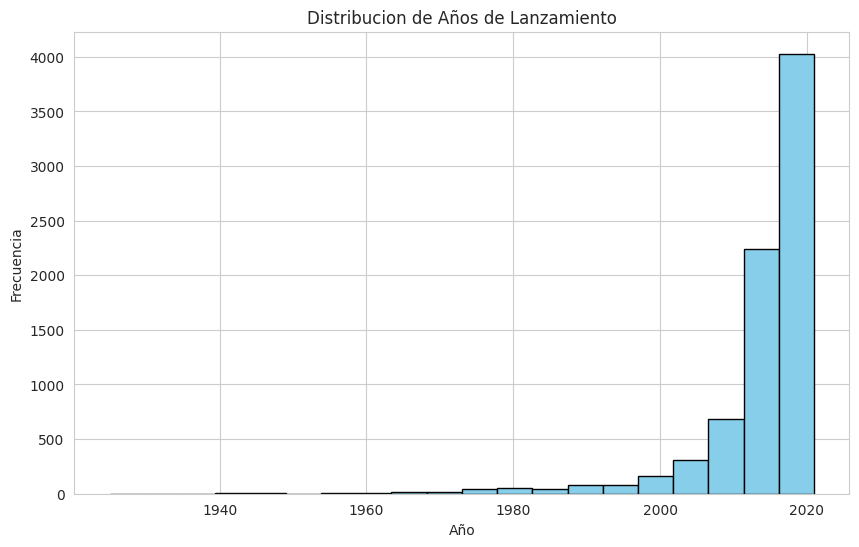

In [60]:
plt.figure(figsize=(10, 6))
plt.hist(df['release_year'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribucion de Años de Lanzamiento')
plt.xlabel('Año')
plt.ylabel('Frecuencia')

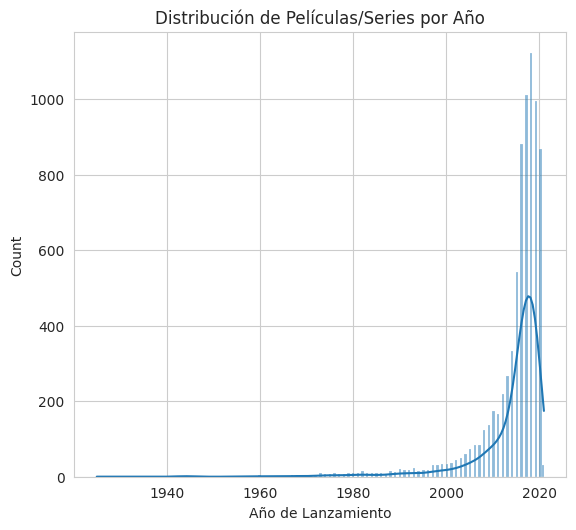

In [61]:
#codigo que la maestra nos dio de ejemplo
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")

plt.subplot(2, 3, 1)
sns.histplot(df['release_year'], kde=True)
plt.title('Distribución de Películas/Series por Año')
plt.xlabel('Año de Lanzamiento')

plt.tight_layout()
plt.show()

Histograma de duracion

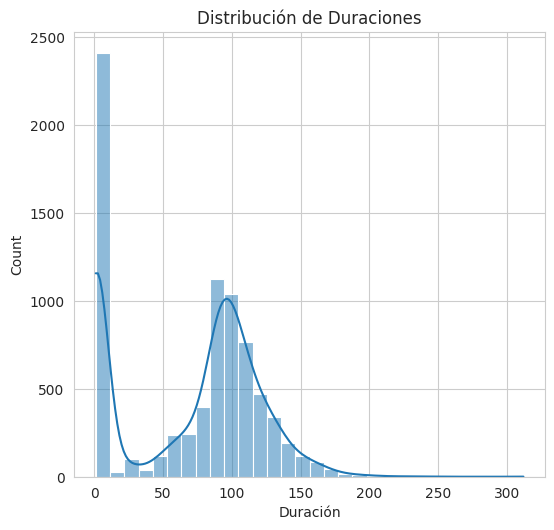

In [62]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 2)
sns.histplot(df['duration'], kde=True)
plt.title('Distribución de Duraciones')
plt.xlabel('Duración')


plt.tight_layout()

plt.show()

Grafico de barras de rating


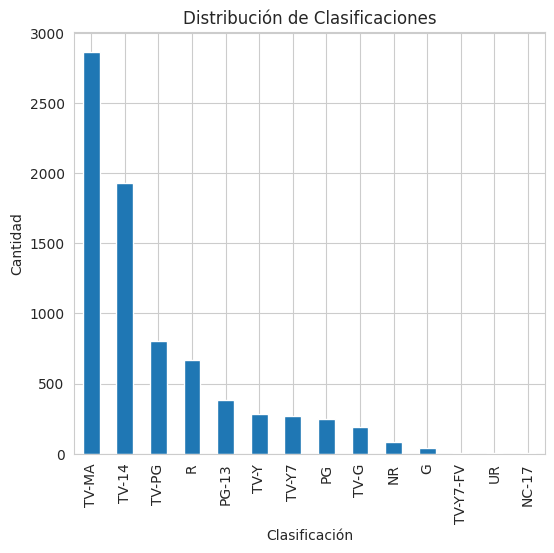

In [63]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 3)
df['rating'].value_counts().plot(kind='bar')
plt.title('Distribución de Clasificaciones')
plt.xlabel('Clasificación')
plt.ylabel('Cantidad')


plt.tight_layout()
plt.show()

Graficos de pastel

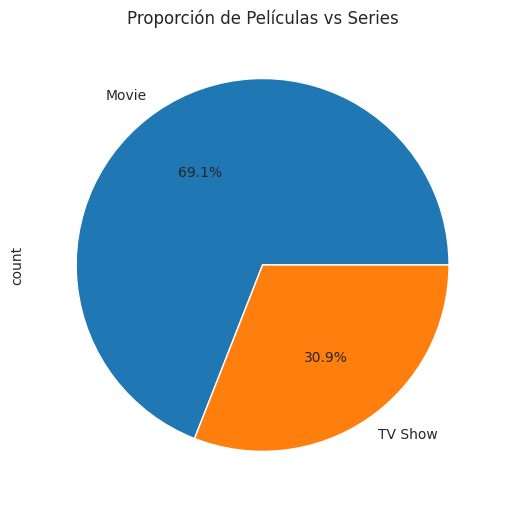

In [64]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 4)
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de Películas vs Series')


plt.tight_layout()
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Documentaries'),
  Text(1, 0, 'Stand-Up Comedy'),
  Text(2, 0, 'Dramas, International Movies'),
  Text(3, 0, 'Comedies, Dramas, International Movies'),
  Text(4, 0, 'Dramas, Independent Movies, International Movies'),
  Text(5, 0, "Kids' TV"),
  Text(6, 0, 'Children & Family Movies'),
  Text(7, 0, 'Documentaries, International Movies'),
  Text(8, 0, 'Children & Family Movies, Comedies'),
  Text(9, 0, 'Comedies, International Movies')])

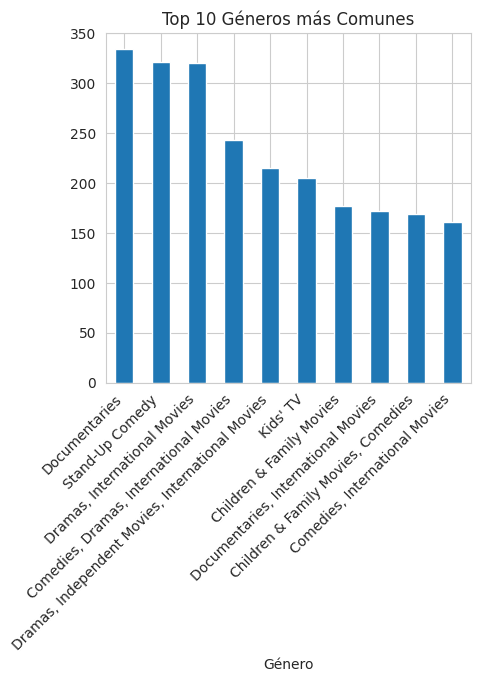

In [68]:
#grafico de barras con el top 10 generos mas comunes
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 5)
df['genres'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Géneros más Comunes')
plt.xlabel('Género')
plt.xticks(rotation=45, ha='right')

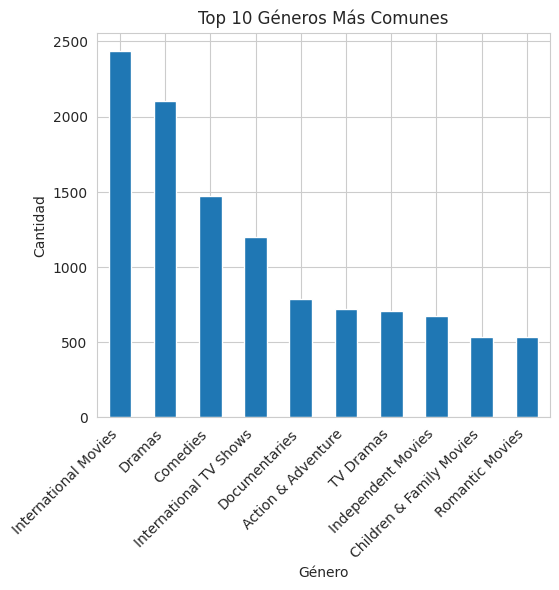

In [67]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 6)
df['genres'].str.split(', ', expand=True).stack().value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Géneros Más Comunes')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()